# Aufgabe 1

In [1]:
import numpy as np

import networkx as nx

from utils import get_google, get_wiki, neighbors, top_nodes, plot

In [2]:
WIKI_START = 46
GOOGLE_START = 11432

In [3]:
def pagerank(G: nx.DiGraph, beta=.85, eps=1e-8):
    V = G.nodes()
    N = G.number_of_nodes()
    r = np.ones(N) / N
    M = nx.adjacency_matrix(G)

    d = M.sum(axis=1)  # out degree

    M = (M / d[:, None]).T

    for i in range(1 << 20):
        r0, r = r, beta * M @ r
        r += (1 - sum(r)) / N
        if np.linalg.norm(r0 - r, 1) < eps: break

    print(f'Took {i + 1} iterations')
    return dict(zip(V, r.tolist()))

In [4]:
def aufgabe_1(G, start):
    G = neighbors(G, start, depth=2)
    pr1, pr2 = pagerank(G), nx.pagerank(G)

    top_pr1 = top_nodes(pr1, 30, False)
    top_pr2 = top_nodes(pr2, 30, False)
    plot({*top_pr1, *top_pr2}, pr1, pr2)

    return {'My PageRank': top_nodes(pr1), 'True PageRank': top_nodes(pr2)}

In [5]:
google = get_google()
wiki = get_wiki()

Reading graph from file:   0%|          | 0/5105043 [00:00<?, ?it/s]

Reading graph from file:   0%|          | 0/28511807 [00:00<?, ?it/s]

Took 25 iterations


/opt/homebrew/anaconda3/envs/deep-learning/lib/python3.11/site-packages/scipy/sparse/_base.py:704: RuntimeWarning: divide by zero encountered in divide
  recip = np.true_divide(1., other)


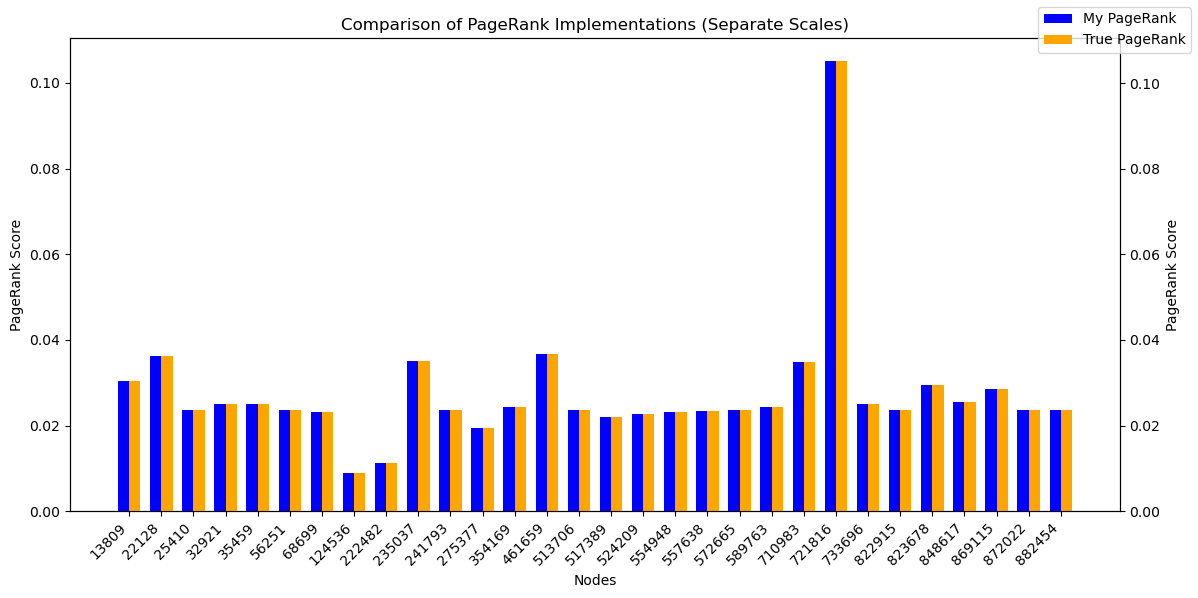

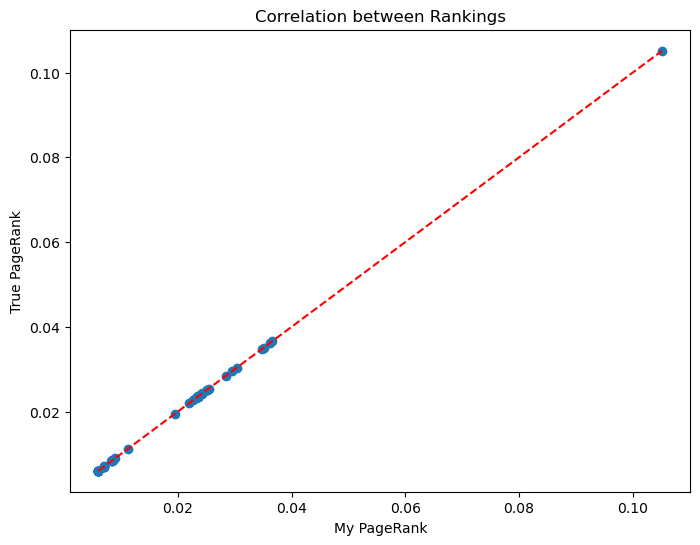

{'My PageRank': {721816: 0.1051596734588209,
  461659: 0.03660033170490469,
  22128: 0.036264986128219365,
  235037: 0.03510841215809506,
  710983: 0.03485284622960096},
 'True PageRank': {721816: 0.10516349611930445,
  461659: 0.036600518545189795,
  22128: 0.03626533439776253,
  235037: 0.035112579338122105,
  710983: 0.03485159183648259}}

In [6]:
aufgabe_1(google, GOOGLE_START)

/opt/homebrew/anaconda3/envs/deep-learning/lib/python3.11/site-packages/scipy/sparse/_base.py:704: RuntimeWarning: divide by zero encountered in divide
  recip = np.true_divide(1., other)


Took 77 iterations


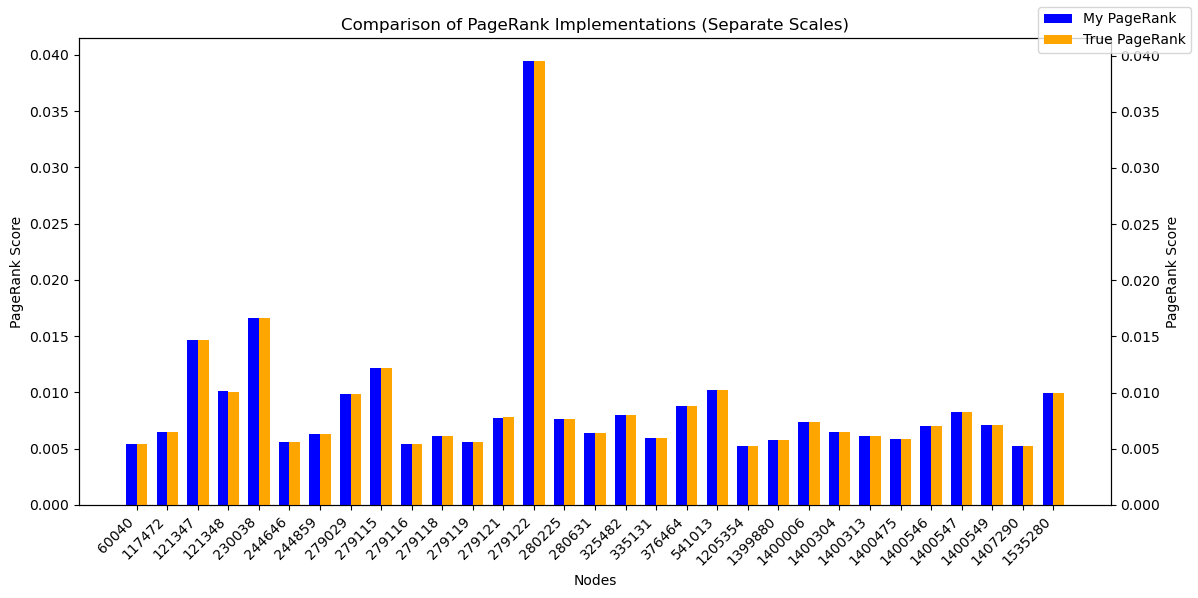

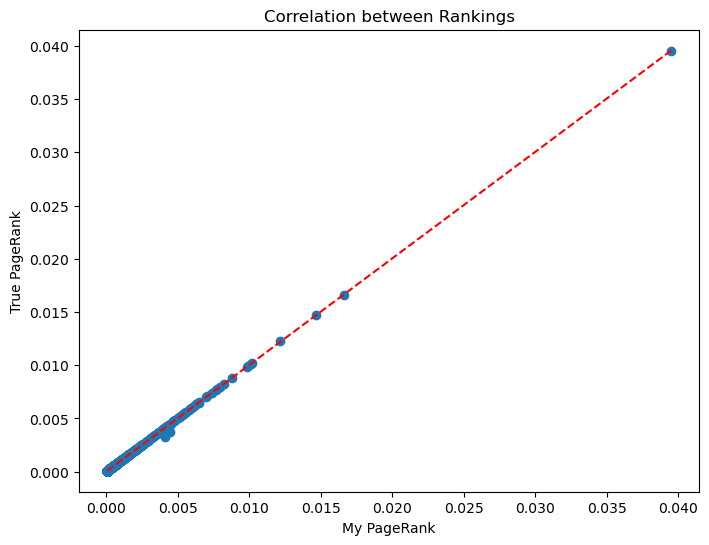

{'My PageRank': {279122: 0.03948760405132608,
  230038: 0.01661072078372879,
  121347: 0.014656225955314647,
  279115: 0.012185118721007786,
  541013: 0.010228231218103007},
 'True PageRank': {279122: 0.03955338014884857,
  230038: 0.016640872138236583,
  121347: 0.014671689772198925,
  279115: 0.012227683983410153,
  541013: 0.010240967799962152}}

In [7]:
aufgabe_1(wiki, WIKI_START)

# Aufgabe 2

In [8]:
import tempfile
import xarray as xr
from PageRank import MRPageRank

In [9]:
def pagerank_step(input_file, beta, N):
    job = MRPageRank(args=[input_file, '--beta', str(beta), '-N', str(N)])
    with job.make_runner() as runner:
        runner.run()
        result = np.array(list(job.parse_output(runner.cat_output())))
        return xr.DataArray(result[:, 1], coords={'i': result[:, 0].astype(int)})

In [10]:
def prepare_input(G, r, tmp):
    tmp.writelines(
        f"{i}\t{tab.join(map(str, nbrs))}\t{r.sel(i=i).item()}\n" for i, nbrs in G.adjacency())
    tmp.flush()


def output_result(output_file, r):
    with open(output_file, 'w') as out:
        out.writelines(f"{int(i)}\t{rk}\n" for i, rk in zip(r.coords['i'].values, r.values))

In [11]:
eps = 1e-6
beta = .85
tab = '\t'  # backslash not allowed in fstring


def pagerank_mr(G, output_file):
    N = G.number_of_nodes()
    r = xr.DataArray(np.ones(N) / N, coords={'i': G.nodes()})

    for i in range(1 << 20):
        with tempfile.NamedTemporaryFile('w') as tmp:
            prepare_input(G, r, tmp)
            r0, r = r, pagerank_step(tmp.name, beta, N)

        if np.linalg.norm(r0 - r, 1) < eps: break

    print(f'Took {i + 1} iterations')
    output_result(output_file, r)

    return dict(zip(r.coords['i'].values, r.values))

In [12]:
def aufgabe_2(G, start, output_file):
    G = neighbors(G, start, depth=2)
    msr, pr = pagerank_mr(G, output_file), nx.pagerank(G)

    top_msr = top_nodes(msr, 30, False)
    top_pr = top_nodes(pr, 30, False)
    plot({*top_pr, *top_msr}, msr, pr)

    return {'MR PageRank': top_nodes(msr), 'True PageRank': top_nodes(pr)}

No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for 

Took 43 iterations


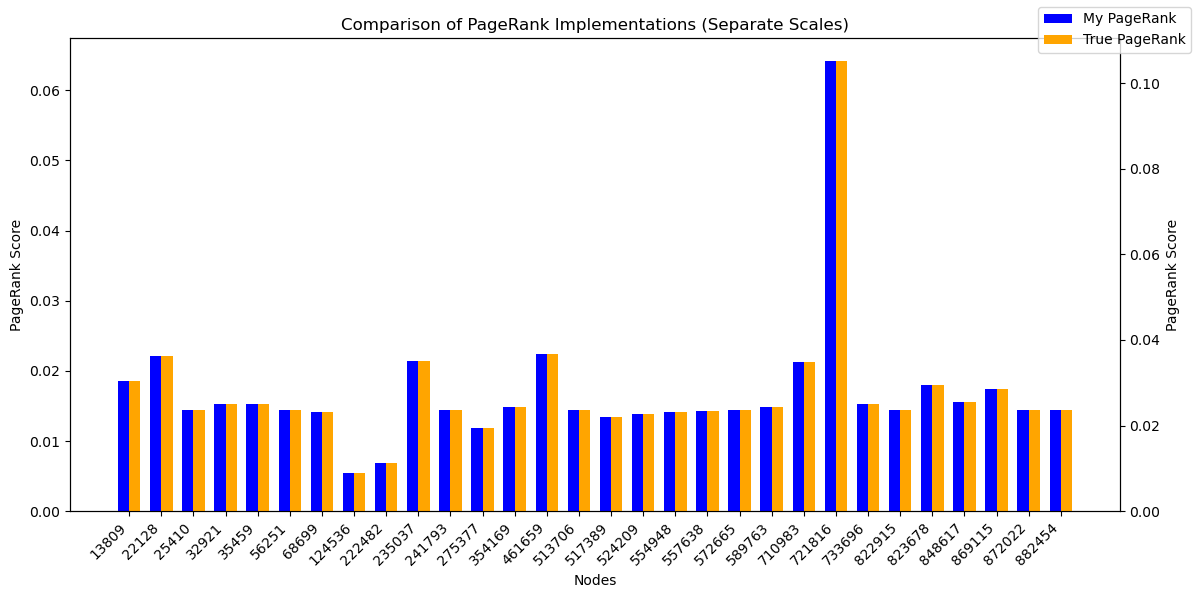

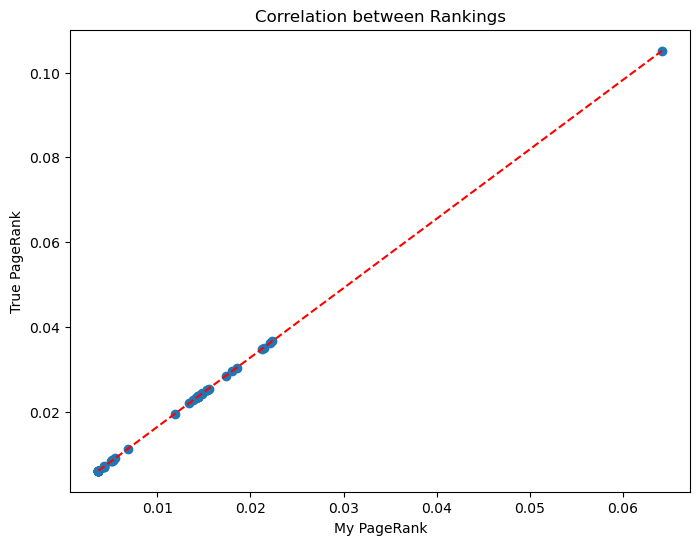

{'MR PageRank': {np.int64(721816): np.float64(0.06419555829448599),
  np.int64(461659): np.float64(0.022342975962327042),
  np.int64(22128): np.float64(0.022138260519781773),
  np.int64(235037): np.float64(0.021432143075207084),
  np.int64(710983): np.float64(0.0212762429672015)},
 'True PageRank': {721816: 0.10516349611930445,
  461659: 0.036600518545189795,
  22128: 0.03626533439776253,
  235037: 0.035112579338122105,
  710983: 0.03485159183648259}}

In [13]:
aufgabe_2(google, GOOGLE_START, 'google-subgraph-ranks')

No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for inline runner
No configs specified for 

Took 56 iterations


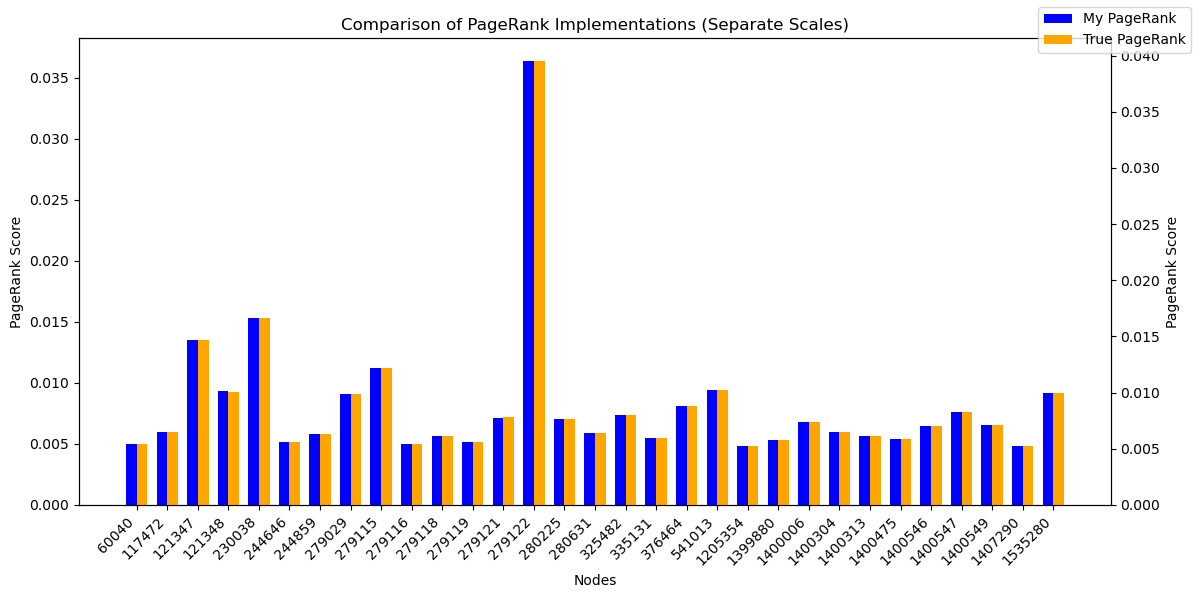

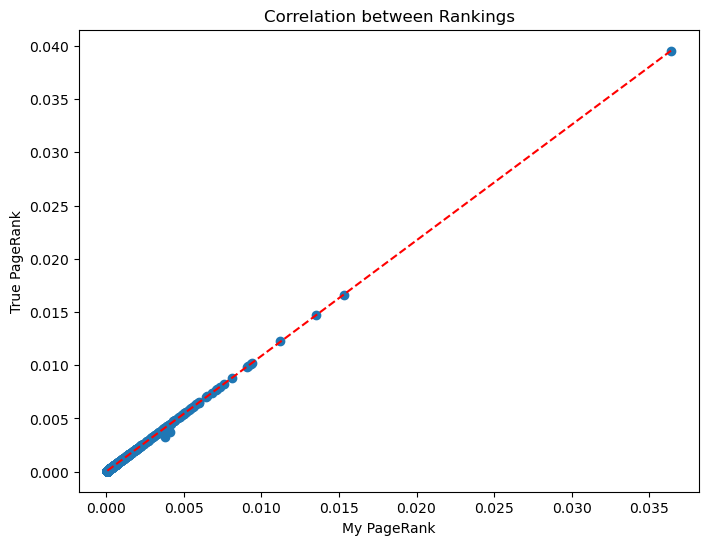

{'MR PageRank': {np.int64(279122): np.float64(0.03639734347519972),
  np.int64(230038): np.float64(0.015310804525599634),
  np.int64(121347): np.float64(0.013509266682522612),
  np.int64(279115): np.float64(0.011231513770722198),
  np.int64(541013): np.float64(0.009427793120307346)},
 'True PageRank': {279122: 0.03955338014884857,
  230038: 0.016640872138236583,
  121347: 0.014671689772198925,
  279115: 0.012227683983410153,
  541013: 0.010240967799962152}}

In [14]:
aufgabe_2(wiki, WIKI_START, 'wiki-subgraph-ranks')

# Aufgabe 3

## Schwierigkeiten
- Mehrfacher Aufruf von Map Reduce
    - Dafür musste immer wieder input geschrieben werden
    - Hätte vereinfacht werden können, indem output = nächster input wird
- In der VL nur zeilenweiser Algorithmus - Umwandlung in Matrixform war unerwartet verwirrend 

---

## Erkenntnisse aus der Übung
- Schrittweise Implementierung
  - Zuerst die Implementierung ohne MapReduce, dann mit hat geholfen beim Verständnis